**Reading of the dataset**

In [1]:
import pandas as pd
import numpy as np
# csvs/hog_95/extracted_features_hog_95.csv
df1 = pd.read_csv('/home/swaksh/VSCode/prml_project/Face_Recognition/csvs/hog_95/extracted_features_hog_95.csv',header=None)
df2 = pd.read_csv('/home/swaksh/VSCode/prml_project/Face_Recognition/csvs/hog_95/extracted_features_test_hog_95.csv',header=None)

df = pd.concat([df1,df2])
print(df.shape)


(13233, 3249)


**Visuelise The occurence Of Each Name No. Of Times In the Dataset** 

In [2]:
name_counts = df.iloc[:,0].value_counts()

print(name_counts)

for value in df.iloc[:,0].value_counts():
    print(value)

0
George_W_Bush        530
Colin_Powell         236
Tony_Blair           144
Donald_Rumsfeld      121
Gerhard_Schroeder    109
                    ... 
Brian_De_Palma         1
David_Rivkin_Jr        1
Koichiro_Matsuura      1
Olivera_Labus          1
Jalen_Rose             1
Name: count, Length: 5749, dtype: int64
530
236
144
121
109
77
71
60
55
53
52
52
49
48
44
42
42
41
41
39
39
37
36
35
33
33
33
32
32
32
31
31
30
30
29
29
28
28
27
26
26
25
24
24
24
23
23
23
22
22
22
22
22
21
21
21
21
20
20
20
20
20
19
19
19
19
19
19
19
18
18
18
18
18
17
17
17
17
17
17
17
17
16
16
16
15
15
15
15
15
15
15
15
15
15
15
14
14
14
14
14
14
14
14
14
14
13
13
13
13
13
13
13
13
13
13
13
12
12
12
12
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6


**Printing What Will Be The Size OF The Dataset**

In [3]:
count = 0
for value in name_counts:
    if(value >=10): count+= value
    
print(count)

4324


**Filtering The Dataset With Names That Occurs More than 10 Times** 

In [22]:
filtered_names_indices = name_counts[(name_counts >= 10) & (name_counts < 50)].index.to_list()
new_df = df[df.iloc[:,0].isin(filtered_names_indices)]

print(new_df.shape)

(2764, 3249)


**Splitting Filtered Dataset Into Train and Test**

In [23]:
y = new_df.iloc[:,0]
X = new_df.drop(columns=[new_df.columns[0]])
print(X.shape," ",y.shape)

(2764, 3248)   (2764,)


**Normalization Of Dataset**

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
print(X_train.shape,"\n",X_test.shape,"\n",y_train.shape,"\n",y_test.shape)

(2211, 3248) 
 (553, 3248) 
 (2211,) 
 (553,)


**Normalisation Of The Dataset**

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Convert y_train and y_test into Numeric Values As ANN Trains On Numerical Data**

In [25]:
y_train = y_train.values.flatten()
labels_train ,unique_train = pd.factorize(y_train)

print(labels_train,"\n",len(unique_train))


[  0   1   2 ...   3  25 134] 
 146


**Filtered Data Labels Calculate Value Count**

In [26]:
labels_count_train = pd.Series(labels_train).value_counts()
print(labels_count_train)

26     42
49     39
47     37
52     33
12     32
       ..
137     6
134     6
34      6
70      5
59      5
Name: count, Length: 146, dtype: int64


**Mapping The Names With The Numeric Value(Labels) Passed As The y_train To The Model** 

In [27]:
y_train = np.array(labels_train)
print(y_train.shape)

(2211,)


In [28]:
labels_unique = np.unique(labels_train)
print(labels_unique.shape, unique_train.shape)

(146,) (146,)


In [29]:
y_train_labels_to_names = {}
for i in range(len(labels_unique)):
    y_train_labels_to_names[labels_unique[i]] = unique_train[i]
    
print(y_train_labels_to_names)
print(len(y_train_labels_to_names))

{0: 'Pierce_Brosnan', 1: 'Vicente_Fox', 2: 'Jose_Maria_Aznar', 3: 'Guillermo_Coria', 4: 'George_Robertson', 5: 'Ari_Fleischer', 6: 'Gonzalo_Sanchez_de_Lozada', 7: 'Joe_Lieberman', 8: 'Juan_Carlos_Ferrero', 9: 'Atal_Bihari_Vajpayee', 10: 'Arnold_Schwarzenegger', 11: 'Laura_Bush', 12: 'Alvaro_Uribe', 13: 'Nestor_Kirchner', 14: 'Jennifer_Aniston', 15: 'Bill_Simon', 16: 'Recep_Tayyip_Erdogan', 17: 'Edmund_Stoiber', 18: 'Michael_Bloomberg', 19: 'Ricardo_Lagos', 20: 'Queen_Elizabeth_II', 21: 'Wen_Jiabao', 22: 'Harrison_Ford', 23: 'Catherine_Zeta-Jones', 24: 'Paul_Bremer', 25: 'Naomi_Watts', 26: 'Vladimir_Putin', 27: 'Megawati_Sukarnoputri', 28: 'Jack_Straw', 29: 'Richard_Gere', 30: 'Julie_Gerberding', 31: 'Britney_Spears', 32: 'Rudolph_Giuliani', 33: 'Lleyton_Hewitt', 34: 'Jason_Kidd', 35: 'Abdullah_Gul', 36: 'Mahathir_Mohamad', 37: 'Lindsay_Davenport', 38: 'Ann_Veneman', 39: 'Julianne_Moore', 40: 'Jiang_Zemin', 41: 'Dominique_de_Villepin', 42: 'Tom_Hanks', 43: 'Sergey_Lavrov', 44: 'Alejandr

**Functions For Getting Names and Acuracy Of The Prediction**

In [30]:
def computeNames(all_predictions):
    y_pred= []
    for prediction in all_predictions:
        y_pred.append(np.argmax(prediction))

    y_pred = np.array(y_pred)

    y_pred_names = []

    for label in y_pred:
        y_pred_names.append(y_train_labels_to_names[label])

    y_pred_names = np.array(y_pred_names)
    # print(y_pred_names)
    return y_pred_names

def computeAccuracy(pred_names):
    count = 0
    for i in range(len(pred_names)):
        if pred_names[i] == y_test[i]:
            print("y_pred_names is: ",pred_names[i] ," and ","y_test name is: ",y_test[i])
            count+=1

    accuracy = count/len(pred_names)
    print("\n\nAccuracy is this: ",accuracy)
    return accuracy
    


**Function To Plot The Validation Accuracy v/s Training Accuracy Loss v/s loss To Decide The epochs to Be Taken**

In [31]:
import matplotlib.pyplot as plt
        
def plot_training_history(history):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy Curves')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.plot(history.history['loss'], label='Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss Curves')
        plt.legend()

        plt.tight_layout()
        plt.show()


**Train The Data On ANN Model And Predict**

**Taken The Same Best Model From my other Code Where target>=50 are Considered**

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout

model_10_to_50 = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(3248,)),
    Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(146, activation='softmax')
])

model_10_to_50.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = np.array(X_train)
y_train = np.array(y_train)
history_10_to_50 = model_10_to_50.fit(X_train,y_train,epochs=150,batch_size=64,validation_split=0.2)

X_test = np.array(X_test)
y_test = np.array(y_test)
predictions = model_10_to_50.predict(X_test)
names_p = computeNames(predictions)
computeAccuracy(names_p)
    

Epoch 1/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0076 - loss: 5.8049 - val_accuracy: 0.0361 - val_loss: 4.9347
Epoch 2/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0219 - loss: 5.0557 - val_accuracy: 0.0361 - val_loss: 4.9352
Epoch 3/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0208 - loss: 4.9079 - val_accuracy: 0.0429 - val_loss: 4.8895
Epoch 4/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0307 - loss: 4.8441 - val_accuracy: 0.0632 - val_loss: 4.8436
Epoch 5/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0501 - loss: 4.7272 - val_accuracy: 0.0767 - val_loss: 4.7543
Epoch 6/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0559 - loss: 4.5997 - val_accuracy: 0.1061 - val_loss: 4.6539
Epoch 7/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0743 - loss: 4.4364 - val_accuracy: 0.1196 - val_loss: 4.5830
Epoch 8/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1018 - loss: 4.2649 - val_accuracy: 0.

0.32368896925858953

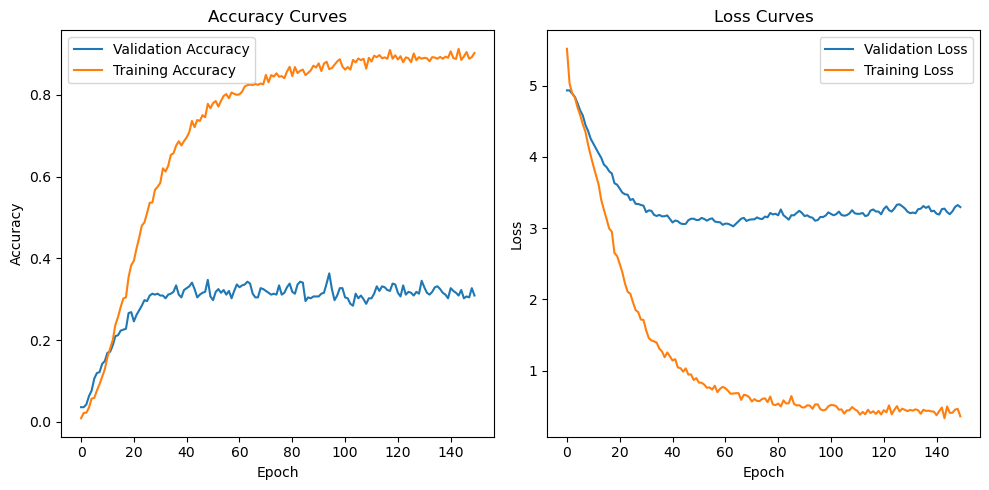

In [21]:
plot_training_history(history_10_to_50)

In [25]:
import os
directory = "/home/swaksh/VSCode/prml_project/Face_Recognition/ANN_Models/"
model_10_to_50.save(os.path.join(directory, "model_10_to_50_concatenated.keras"))

**Seperately Training The HoG,CNN and lbp**

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train_hog = X_train[:,1:945]
X_test_hog = X_test[:,1:945]

X_train_cnn = X_train[:,945:2993]
X_test_cnn = X_test[:,945:2993]

X_train_lbp = X_train[:,2993:]
X_test_lbp = X_test[:,2993:]

print(X_train_hog.shape,X_test_hog.shape,X_train_cnn.shape,X_test_cnn.shape,X_train_lbp.shape,X_test_lbp.shape)



(2211, 944) (553, 944) (2211, 2048) (553, 2048) (2211, 255) (553, 255)


**Train On HoG Features**

In [28]:
import tensorflow as tf
import keras
from keras import layers,models
import torch
from keras.layers import Dropout

model_hog = keras.Sequential([
    keras.layers.Dense(512,activation='relu',input_shape=(944,)),
    Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(128,activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(146,activation='softmax'),  # Here 4883 are my unique labels
    
])

model_hog.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_hog = np.array(X_train_hog)
y_train = np.array(y_train)
print(X_train_hog.dtype,y_train.dtype)
history_10_to_50_hog = model_hog.fit(X_train_hog,y_train,epochs=80,batch_size=64,validation_split=0.2)


X_test_hog = np.array(X_test_hog)
y_test = np.array(y_test)
predictions_hog = model_hog.predict(X_test_hog)
pred_names_hog = computeNames(predictions_hog)
computeAccuracy(pred_names_hog)


float64 int64
Epoch 1/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0047 - loss: 5.6158 - val_accuracy: 0.0113 - val_loss: 4.9619
Epoch 2/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0085 - loss: 5.0152 - val_accuracy: 0.0045 - val_loss: 4.9604
Epoch 3/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0190 - loss: 4.9307 - val_accuracy: 0.0226 - val_loss: 4.9472
Epoch 4/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0214 - loss: 4.8700 - val_accuracy: 0.0181 - val_loss: 4.9400
Epoch 5/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0209 - loss: 4.8355 - val_accuracy: 0.0203 - val_loss: 4.9329
Epoch 6/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0310 - loss: 4.7646 - val_accuracy: 0.0203 - val_loss: 4.9123
Epoch 7/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0498 - loss: 4.6792 - val_accuracy: 0.0135 - val_loss: 4.9011
Epoch 8/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0559 - loss: 4.6311 - val_accuracy: 0.03

0.1735985533453888

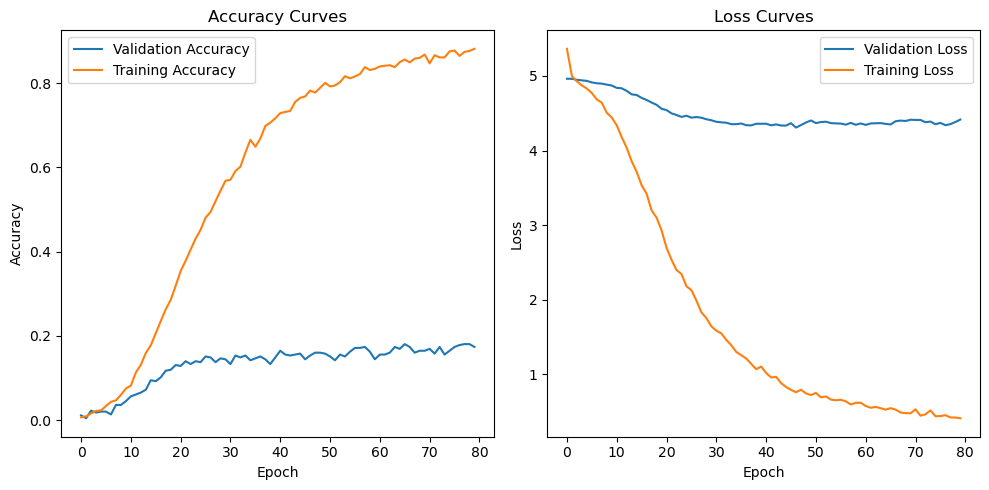

In [29]:
plot_training_history(history_10_to_50_hog)

In [30]:
import os
directory = "/home/swaksh/VSCode/prml_project/Face_Recognition/ANN_Models/"
model_hog.save(os.path.join(directory, "model_10_to_50_hog.keras"))

**From The Mapped lables To Names Get y_pred_hog Names And Accuracy Calculation**

**Train On CNN Features**

In [34]:
import tensorflow as tf
import keras
from keras import layers,models
import torch

model_cnn = keras.Sequential([
    keras.layers.Dense(1028,activation='relu',input_shape=(2048,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(146,activation='softmax'),  # Here 4883 are my unique labels
    
])

model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_cnn = np.array(X_train_cnn)
y_train = np.array(y_train)
history_10_to_50_cnn = model_cnn.fit(X_train_cnn,y_train,epochs=80,batch_size=64,validation_split=0.2)

X_test_cnn = np.array(X_test_cnn)
y_test = np.array(y_test)
predictions_cnn = model_cnn.predict(X_test_cnn)
pred_names = computeNames(predictions_cnn)
computeAccuracy(pred_names)

Epoch 1/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0090 - loss: 5.7179 - val_accuracy: 0.0316 - val_loss: 4.9015
Epoch 2/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0254 - loss: 4.9412 - val_accuracy: 0.0745 - val_loss: 4.8337
Epoch 3/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0570 - loss: 4.6848 - val_accuracy: 0.1016 - val_loss: 4.6470
Epoch 4/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0667 - loss: 4.5254 - val_accuracy: 0.1151 - val_loss: 4.4889
Epoch 5/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0972 - loss: 4.3249 - val_accuracy: 0.1354 - val_loss: 4.2777
Epoch 6/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0961 - loss: 4.2152 - val_accuracy: 0.1490 - val_loss: 4.1414
Epoch 7/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1337 - loss: 3.8999 - val_accuracy: 0.1467 - val_loss: 4.0346
Epoch 8/80
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1930 - loss: 3.6185 - val_accuracy: 0.1738 - v

0.27486437613019893

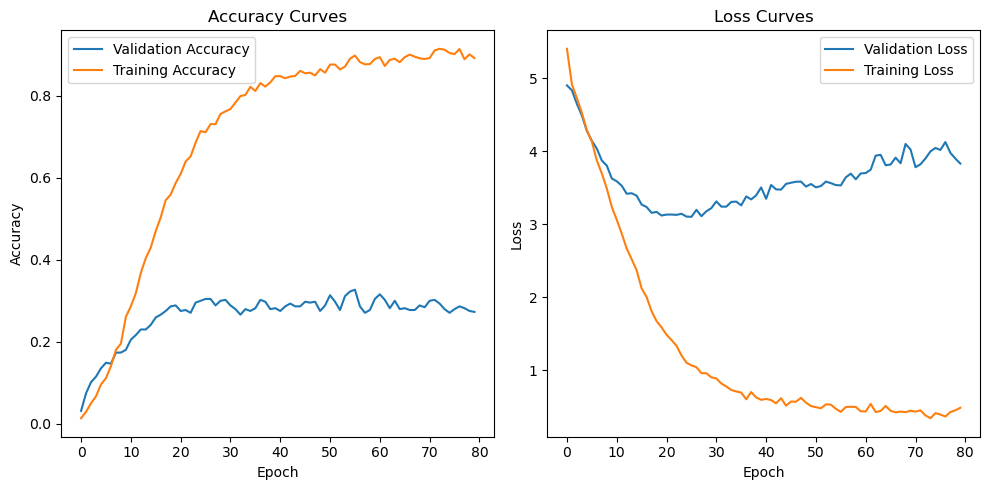

In [35]:
plot_training_history(history_10_to_50_cnn)

In [36]:
import os
directory = "/home/swaksh/VSCode/prml_project/Face_Recognition/ANN_Models/"
model_hog.save(os.path.join(directory, "model_10_to_50_cnn.keras"))

**Train Model On lbp Features**

In [40]:
import tensorflow as tf
import keras
from keras import layers,models
import torch

model_lbp = keras.Sequential([
    keras.layers.Dense(512,activation='relu',input_shape=(255,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(146,activation='softmax'),
    
])

model_lbp.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(y_train.shape)

X_train_lbp = np.array(X_train_lbp)
y_train = np.array(y_train)
history_10_to_50_lbp = model_lbp.fit(X_train_lbp,y_train,epochs=50,batch_size=64,validation_split=0.2)

X_test_lbp = np.array(X_test_lbp)
y_test = np.array(y_test)
predictions_lbp = model_lbp.predict(X_test_lbp)
pred_names = computeNames(predictions_lbp)
computeAccuracy(pred_names)

(2211,)
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0049 - loss: 5.3089 - val_accuracy: 0.0158 - val_loss: 4.9738
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0162 - loss: 4.9811 - val_accuracy: 0.0090 - val_loss: 4.9535
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0197 - loss: 4.9683 - val_accuracy: 0.0113 - val_loss: 4.9450
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0250 - loss: 4.9249 - val_accuracy: 0.0158 - val_loss: 4.9271
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0202 - loss: 4.9172 - val_accuracy: 0.0203 - val_loss: 4.9201
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0201 - loss: 4.8897 - val_accuracy: 0.0293 - val_loss: 4.8975
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0288 - loss: 4.8761 - val_accuracy: 0.0451 - val_loss: 4.8875
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0336 - loss: 4.8243 - val_accuracy: 0.0316

0.05786618444846293

**From The Mapped lables To Names Get y_pred_lbp Names And Accuracy Calculation**

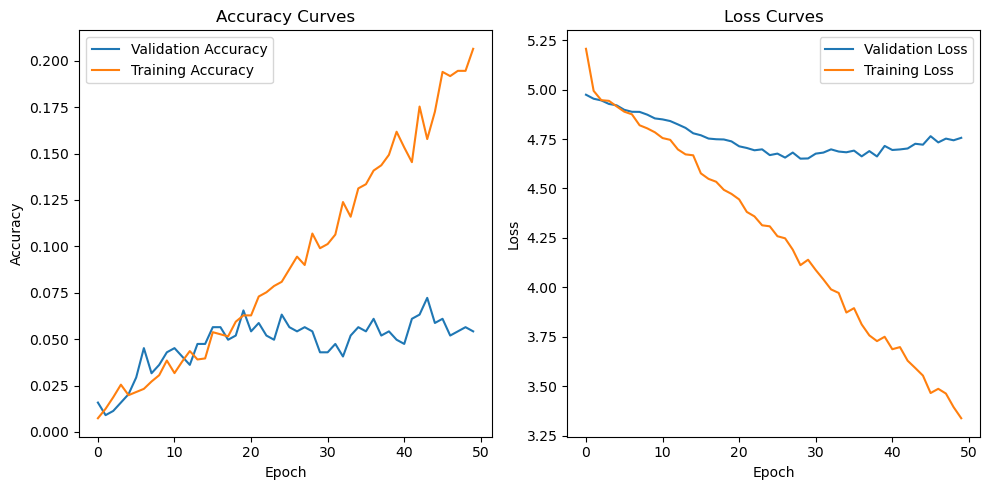

In [41]:
plot_training_history(history_10_to_50_lbp)

In [42]:
import os
directory = "/home/swaksh/VSCode/prml_project/Face_Recognition/ANN_Models/"
model_hog.save(os.path.join(directory, "model_10_to_50_lbp.keras"))